## Daily exercise, part 1

The file <code>mpg.xlsx</code> (in the data folder) contains observations on fuel economy and 6 additional attributes for 398 different car models. The column <code>mpg</code> is a measure of the car's fuel economy, i.e. the number of miles per gallon of petrol.
        
Import the file and answer the following questions:

1. Which columns in the <code>DataFrame</code> are strings?


2. What is the average number of miles per gallon of the car models in the data?


3. What are the unique number of cylinders observed in the data?


4. How many of the car models in the data were from Europe?


5. What is the correlation between cars' fuel economy and horsepower?


6. Are there any missing observations in the data?

In [3]:
import pandas as pd

# Load the data
df = pd.read_excel('mpg.xlsx')

# 1. Which columns in the DataFrame are strings?
df.info()
# Columns that are strings are "origin" and "name"

# 2. What is the average number of miles per gallon of the car models in the data?
average_mpg = df['mpg'].mean()
print(f"The average number of miles per gallon is {average_mpg:.2f}")

# 3. Find amount of unique cylinders
unique_cylinders = df['cylinders'].nunique()
print(f"There are {unique_cylinders} unique cylinders")

# 4. How many of the car models were from Europe?
models_from_europe = df['origin'].value_counts().get('europe', 0)
print(f"{models_from_europe} models were from Europe")

# 5. What is the correlation between cars' fuel economy and horsepower?
corr_mpg_hp = df['mpg'].corr(df['horsepower'])
print(f"The correlation between fuel economy (mpg) and horsepower is {corr_mpg_hp:.2f}")

# 6. Are there any missing observations in the data?
missing_observations = df.isna().sum().sum()
print(f"There are {missing_observations} missing observations in the dataset")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   name          398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
The average number of miles per gallon is 23.51
There are 5 unique cylinders
70 models were from Europe
The correlation between fuel economy (mpg) and horsepower is -0.78
There are 6 missing observations in the dataset


## Daily exercise, part 2

Again, use the data in <code>mpg.xlsx</code> and explore the data visually.

Create a figure with 2 x 2 subplots:

- In the first row, first column, show a histogram of <code>mpg</code>


- In the first row, second column, show a bar plot of <code>origin</code>


- In the second row, first column, show a scatter plot of <code>mpg</code> and <code>weight</code>


- In the second row, second column, show a scatter plot of <code>mpg</code> and <code>acceleration</code>

In the two scatter plots, add the correlation coefficient between the two columns being plotted in the subplot title. Style the subplots to make them look nice and save the figure as `mpg_plot.png`.


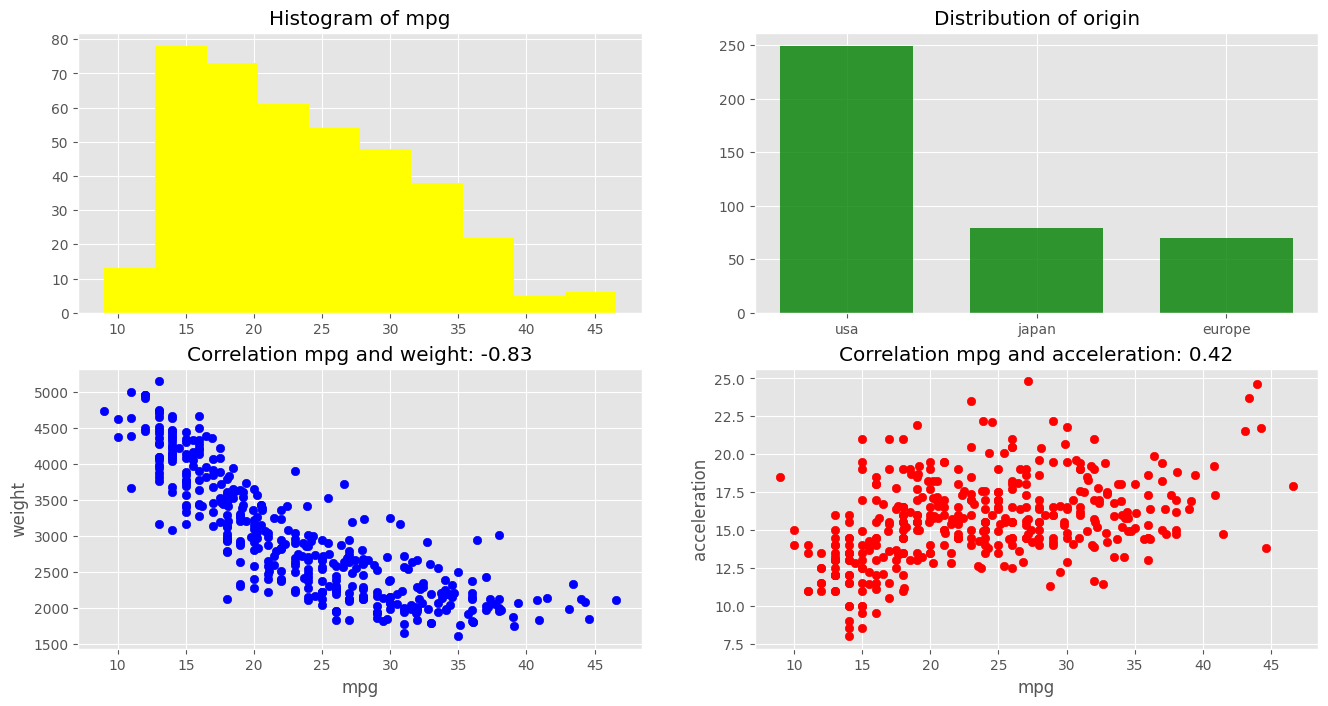

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(16, 8)
)

# Add histogram of mpg
ax[0, 0].hist(df['mpg'], color='yellow')
ax[0, 0].set_title('Histogram of mpg')

# Add barplot of origin
p_origin = df['origin'].value_counts()
categories = ['usa', 'japan', 'europe']
ax[0, 1].bar(categories, [p_origin.get(cat, 0) for cat in categories], width=0.7, alpha=0.8, color='green')
ax[0, 1].set_title('Distribution of origin')

# Add scatterplot of mpg and weight
corr_mpg_weight = df['mpg'].corr(df['weight'])
ax[1, 0].scatter(df['mpg'], df['weight'], color='blue')
ax[1, 0].set_title(f'Correlation mpg and weight: {corr_mpg_weight:.2f}')
ax[1, 0].set_xlabel('mpg')
ax[1, 0].set_ylabel('weight')

# Add scatterplot of mpg and acceleration
corr_mpg_acceleration = df['mpg'].corr(df['acceleration'])
ax[1, 1].scatter(df['mpg'], df['acceleration'], color='red')
ax[1, 1].set_title(f'Correlation mpg and acceleration: {corr_mpg_acceleration:.2f}')
ax[1, 1].set_xlabel('mpg')
ax[1, 1].set_ylabel('acceleration')

# Save the plot
plt.savefig('mpg_plot.png', bbox_inches='tight')
plt.show()